# Tarea 3: Clasificacion II + Clustering

**Autores:** Felipe Bravo, Bárbara Poblete, Hernan Sarmiento, Aymé Arango, Alison Fernandez, Ignacio Meza, Cinthia Mabel Sánchez, Gabriel Ramos

**Fecha:** Mayo 2021

In [322]:
%%shell
jupyter nbconvert --to html /content/Tarea_3.ipynb

[NbConvertApp] Converting notebook /content/Tarea_3.ipynb to html
[NbConvertApp] Writing 607131 bytes to /content/Tarea_3.html


## ============= Declaración de compromiso ético =============

Nosotros ****Javier Lavados y Nicolas García****, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos o tres personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura de la tarea

Esta tarea consiste en 3 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección introductoria para familiarizarse con métodos de clustering. Finalmente la tercera parte es un problema abierto de clasificación donde deberá usar todos los conocimientos que ha adquirido en el curso hasta este momento. Esos conocimientos incluyen exploración de datos, limpieza, entrenamiento de modelos, selección y evaluación.

# Parte 1: Teoría




**1.** Explique para qué se usan variables de holgura en el problema de optimización de la SVM. 

>Respuesta:
>
>El problema de optimización de la SVM es que el margen del límite de desición del hiperplano sea maximal. El problema es que el dataset puede contener outliers, ruido, o un márgen no trivial, por lo que exigir un margen perfecto es totalmente irreal. Para solucionar esto podemos añadir variables de holgura $\xi$ (en la llamada SVM de márgen suave), la cuál relaje las condiciones de optimización y que permita una cantidad de errores razonable. 


**2.** John Doe, un consultor en minería de datos, argumenta lo siguiente: lo malo de las SVMs es que para que encuentren límites de decisión no lineales tengo que proyectarlas manualmente a más dimensiones con una función $\phi(x)$ que tengo que diseñar de manera manual. Esto hace que todo sea mucho más caro computacionalmente pues todas las operaciones las tengo que hacer sobre el espacio transformado. Discuta el argumento de John Doe.

>Respuesta:
>
>Pese a que John Doe tiene razón respecto al costo de calcular una SVM no lineal, esto puede alivianarse usando el llamado *Kernel Trick*. La idea del *Kernel Trick* es calcular el producto punto del espacio trasformado ($\phi (x)ϕ(z)$) inmediatamente y no por separado, con el fin de reducir el costo computacional.



**3.** Usando un clasificador Naive Bayes con Laplace Smoothing entrenado con los datos de la tabla de más abajo, clasifique el siguiente ejemplo a la clase Evade: **[Refund= YES, Marital Status = Divorced]**.

Hint: Tiene que comparar P(Evade=Yes | datos) vs P(Evade=No|datos). Muestre todos sus cálculos.

Refund | Marital Status | Evade
--- | --- | ---
YES | Single | NO
NO | Married | NO
NO | Single | NO
YES | Married | NO
NO | Divorced | YES
NO | Married | NO
YES | Divorced | NO
NO | Single | YES
NO | Married | NO
NO | Single | YES

>Respuesta:
>
>La idea del clasificador Naive Bayes es encontrar la clase C que maximiza $P(C|A_1, A_2, ..., A_n)$. Por lo que clasificar [Refund = YES, Marital Status = Divorced] a la clase *Evade* debe verificar $P(Evade=Yes | Refund=YES, Marital Status=Divorced)$ y $P(Evade=NO | Refund=YES, Marital Status=Divorced)$:
>Usando el Teorema de Bayes:
>$$P(Evade=Yes | Refund=Yes, Marital Status=D) = \frac{P(Refund=Yes, MaritalStatus=Divorced| Evade=Yes) * P(Evade=Yes)}{P(Refund=Yes, MaritalStatus=Divorced)}$$
>
>Asumiendo que son independientes
>
>$$= \frac{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| E=Yes) * P(Evade=Yes)}{P(Refund=Yes, MaritalStatus=Divorced)}$$
>
>Luego tenemos que
>
>$$= \frac{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| E=Yes) * P(Evade=Yes)}{P(Refund=Yes, MaritalStatus=Divorced | Evade=Yes) * P(Evade=Yes) + P(Refund=Yes, MaritalStatus=Divorced| Evade=No) * P(Evade=No)}$$
>
>Asumiendo que son independencia otra vez
>
>$$= \frac{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| Evade=Yes) * P(Evade=Yes)}{P(Refund=Yes| Evade=Yes) * P(MaritalStatus=Divorced| Evade=Yes) * P(Evade=Yes) + P(Refund=Yes| Evade=No) * P(MaritalStatus=Divorced| Evade=No) * P(Evade=No)}$$
>
>Dado que hay probabilidades con valores, usaremos *Laplace Smoothing* con $\alpha = 1$ para calcular las probabilidades:
>$$P(A_i = b | C_k) = \frac{Count(A_{ik} = b) + 1}{Count(C_k) + Values(A_i)}$$
>
>Donde se obtienen los siguientes resultados:
>
>$P(Evade=Yes)$ = $\frac{4}{12}$ = $\frac{1}{3}$
>
>$P(Evade=No)$ = $\frac{8}{12}$ = $\frac{2}{3}$
>
>$P(Refund=Yes|Evade=Yes)$ = $\frac{1}{5}$
>
>$P(Refund=No| Evade=Yes)$ = $\frac{4}{5}$
>
>$P(Refund=Yes| Evade=No)$ = $\frac{4}{9}$
>
>$P(Refund=No| Evade=No)$ = $\frac{5}{9}$
>
>$P(MaritalStatus=Single| Evade=Yes)$ = $\frac{3}{6}$ = $\frac{1}{2}$
>
>$P(MaritalStatus=Married| E=Yes)$ = $\frac{1}{6}$
>
>$P(MaritalStatus=Divorced| Evade=Yes)$ = $\frac{2}{6}$ = $\frac{1}{3}$
>
>$P(MaritalStatus=Single| Evade=No)$ = $\frac{3}{10}$
>
>$P(MaritalStatus=Married| Evade=No)$ = $\frac{5}{10}$ = $\frac{1}{2}$
>
>$P(MaritalStatus=Divorced| Evade=No)$ = $\frac{2}{10}$ = $\frac{1}{5}$
>
>Finalmente la probabilidad buscada será:
>
>$$= \frac{1/5 * 1/3 * 1/3}{1/5 * 1/3 * 1/3 + 4/9 * 1/5 * 2/3}$$ 
>
>$$= \frac{3}{11}$$
>
>Y podemos calcular igualmente
>$$P(Evade=No | Refund=Yes, MaritalStatus=Divorced) = \frac{P(Refund=Yes, MaritalStatus=Divorced| Evade=No) * P(Evade=No)}{P(Refund=Yes, MaritalStatus=Divorced)} = \frac{8}{11}$$
>
>Sigue que
>$$P(Evade=Yes | Refund=Yes, MaritalStatus=Divorced) = \frac{3}{11}$$
>
>$$P(Evade=No | Refund=Yes, MaritalStatus=Divorced) = \frac{8}{11}$$


**4.** Explique cómo bisecting k-mean soluciona el problema de la inicialización de centroides de k-means.

>Respuesta:
>
>K-Means es muy susceptible a los errores de inicialización de los k centroides, ya que el algoritmo de *K-means* recalcula los centroides a partir de las asignaciones iniciales del mismo. Es por esto que la extensión *Bisecting k-mean* busca primero dividir el conjunto de todos los puntos en dos clusters, para luego elegir uno de los subclusters para ser dividido e iterar hasta producir los k clusters. Lo anterior garantiza una buena inicialización de clusters y reduce enormemente los errores de clasificación de clusters.

**5.** Explique cómo encontrar outliers en los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:
>
>Dado que *K-Means* es suceptible a outliers, es probable que un valor muy fuera de rango 'corra' el centroide de un cluster visible a un lugar fuera de este. Lo anterior tiene un alto valor de SSE, por lo que basta notar puntos muy alejados de un cluster para identificarlo como un outlier.
>
>Por otro lado, dado que el *Clustering Jerarquico Aglomerativo* une los clusters más cercanos para crear uno único, los outliers podrían dividir un cluster de gran tamaño hacia un outlier. Esto lleva a que la distancia promedio del cluster del outlier sea mayor a lo normal, pudiendo descartarse fácilmente.

**6.** Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

>Respuesta:
>
>**K-Means**
>Una ventaja de K-Means es que es el método de clustering más sencillo e intuitivo. Pero una desventaja es que este necesita de un k dado que puede que no sea el óptimo dependiendo del dataset.
>
>**Clustering Jerarquico Aglomerativo**
Una ventaja es que puede ser muy robusto a outliers si se usa el cálculo de distancia entre centroides *MAX*, y que puede reconocer grupos no esféricos si se utiliza *MIN*. Pero una desventaja es que si se usa *MAX* dejamos afuera grupos no esféricos, y si se usa *MIN* somos suceptibles a outliers.

**7.** En DBSCAN el parametro `eps` es crucial para obtener buenos clusters. Explique una forma de encontar el valor de `eps`.

>Respuesta:
>
>Para encontrar el valor óptimo de *esp* es necesario ver como se comporta la distancia existente entre cada punto y su k-ésimo vecino más cercano. La distancia existente entre estos se denomina *k-dist*, los cuales al graficar podremos apreciar que la curva en la gráfica aumentará su pendiente de forma drástica. Ese punto de crecimiento exponencial corresponde justamente al valor óptimo de *esp*

**8.** Evaluar clusters no es una tarea fácil. Qué formas de evaluar clusters conoce? Nombre 3 formas de validación y describa cómo podría determinar si los cluters son buenos o malos usando cada una de las formas nombradas.

>Respuesta:
>
>**Matriz de similitud**
>
>Son matrices que permiten visualizar la cercanía de los puntos pertenecientes a un mismo cluster y la lejanía de los puntos de un cluster distinto. Un clustering tiene un buen desempeño si es que en la diagonal de la matriz los valores son cercanos a 0.
>
>
>**Coeficiente de Silhouette**
>
>Este coeficiente calcula para cada punto un valor de asignación entre -1 y 1, donde 1 significa que el punto está bien asignado, -1 que el punto está mal asignado porque hay otro cluster más similar, y 0 que hay solapamiento de clusters. Así podemos chequear con el valor del coeficiente si algoritmo para el conjunto de datos es bueno o no.
>
>
>**Validación con expertos**
>
>Consultar con expertos es otra forma de evaluar si los clusters generados por el algoritmo de clustering producen un resultado esperado o no, ya que son capaces de identificar patrones específicos, resultados inesperados, etc.

# Parte 2: Clustering

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [266]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Utilizaremos sólo los datos del 2006. Ejecute las siguientes líneas de código para filtrar los datos:

In [267]:
X = dataframe[dataframe["anio"] == 2006]
X = X.drop(columns=["comuna", "anio"])
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.

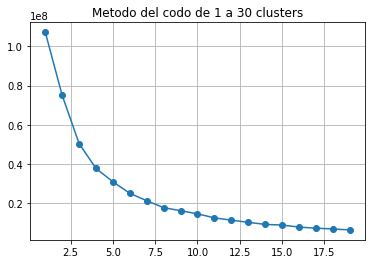

In [268]:
# Respuesta

from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Plotly library
#!pip install plotly --upgrade
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

random_state = 20

sse = []

clusters = list(range(1,20))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 30 clusters")
plt.grid(True)
plt.show()


**2.** Cuántos clusters propone usar para este dataset? Justifique su elección.


> Respuesta: 
>
> Proponemos usar 5 clusters para este dataset, ya que es el punto donde la métrica *SSE* comienza a estabilizarse, y por lo tanto donde nos acercamos más a la cantidad óptima.

**3.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [269]:
# Respuesta
kmeans = KMeans(n_clusters=5, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(X) # fit retorna a self
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 2, 0, 4, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 4, 2, 2, 2, 0, 0, 0, 2, 0, 4, 0, 2, 0, 4, 0, 0, 0,
       4, 1, 1, 1, 1, 4, 4, 2, 2, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 4, 0, 0, 0, 4, 0, 4, 0,
       0, 0, 4, 0, 0, 2, 2, 2, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 4, 4, 4, 4,

**4.** Al ejecutar el código anterior (pregunta 3) varias veces, obtenemos resultados diferentes. Cómo podría evitar los resultados variables de K-means? Presente al menos 2 opciones para lograr esto. Puede implementarlo o describirlo.

> Respuesta: 
>
>Una opción es aumentar aún más la cantidad de ejecuciones del código de clustering e ir guardando las asignaciones de cada punto, para luego ir uno por uno y asignarle el cluster con más recurrencias en la iteración anterior. Este método aunque parezca plausible es poco práctico, eficiente, y no asegura totalmente una asignación correcta para cada punto, dado que no soluciona el problema de fondo, que es la asignación incorrecta de los centroides de los 5 clusters.
>
>La segunda opción es la más eficiente y que nos asegura una buena asignación para cada punto, y es cambiar el algoritmo de clustering **K-Means** por su equivalente **Bisecting K-Means**. Este último disminuye enormemente la cantidad de asignaciones erroneas de los puntos, dado que está hecho para solucionar el problema de asignación inicial de los centroides de los 5 clusters.

**5.** Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters.

In [270]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

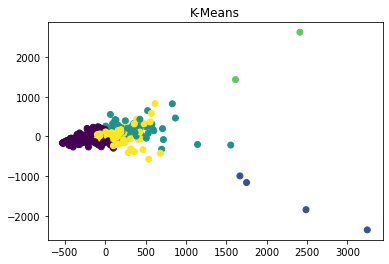

In [323]:
# Respuesta
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

## Clustering Jerárquico Aglomerativo

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

In [311]:
# Respuesta
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

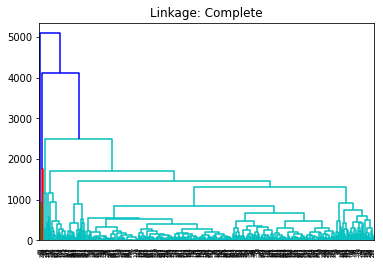

In [312]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

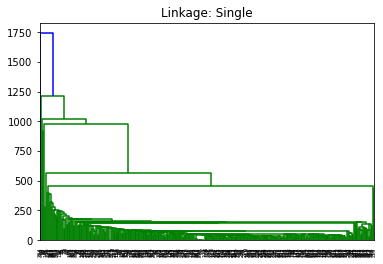

In [314]:
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

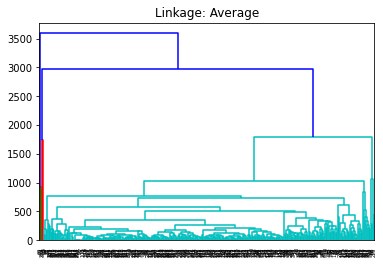

In [315]:
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

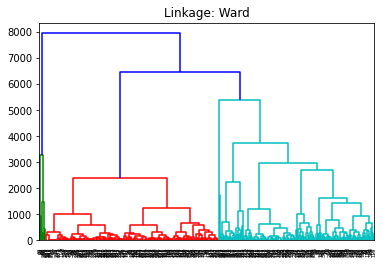

In [317]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

**2.** Fijándose en el método `single`, a qué altura recomendaría cortar el árbol?

> Respuesta:
>
>Nosotros recomendaríamos cortar el árbol a la altura 1100, ya que el resto de ramas generadas a una altura menor aumentan de forma innecesaria la cantidad de clusters, además de que abarcan probablemente outliers

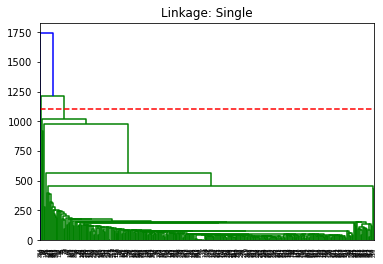

In [318]:
dendrogram(single)
plt.title("Linkage: Single")
plt.axhline(y=1100, color='r', linestyle='--')
plt.show()

**3.** Ahora si miramos el método `ward`, cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters?

> Respuesta: 
>
> Nosotros proponemos usar 3 clusters, el cuál habría que cortar a la altura 6000



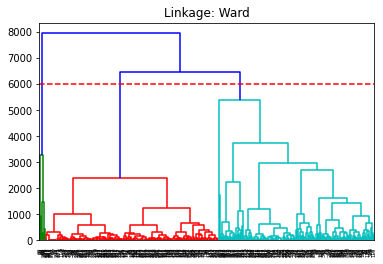

In [319]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.axhline(y=6000, color='r', linestyle='--')
plt.show()

**4.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2.** y **3.** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2.**?

In [279]:
single_all = AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=0).fit(X)
print(single_all.n_clusters_)

single_3 = AgglomerativeClustering(n_clusters=3, linkage="single").fit(X)
print(single_3.n_clusters_)

single_3.labels_

346
3


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [280]:
ward_all = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=0).fit(X)
print(ward_all.n_clusters_)

ward_3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
print(ward_3.n_clusters_)

ward_3.labels_

346
3


array([0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,

**5.** Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`.

> Respuesta: 
>
> Para el método *single*, este asigna el cluster 0 a 344 datos, y los otros dos clusters a un dato cada uno.
>
> Por otro lado, para el método *single* este asigna el primer cluster a 161 datos (al rededor de la mitad), el segundo a solo 6 y el tercero a 179.
>
> A continuación se adjunta el código correspondiente

In [281]:
import collections, numpy
s=single_3.labels_
cantidad_s=collections.Counter(s)
s_0=cantidad_s[0]
s_1=cantidad_s[1]
s_2=cantidad_s[2]

w=ward_3.labels_
cantidad_w=collections.Counter(w)
w_0=cantidad_w[0]
w_1=cantidad_w[1]
w_2=cantidad_w[2]


print("Método Single, Primer Cluster:  "+str(s_0))
print("Método Single, Segundo Cluster: "+str(s_1))
print("Método Single, Tercer Cluster:  "+str(s_2))
print("")
print("Método Ward, Primer Cluster:  "+str(w_0))
print("Método Ward, Segundo Cluster: "+str(w_1))
print("Método Ward, Tercer Cluster:  "+str(w_2))


Método Single, Primer Cluster:  344
Método Single, Segundo Cluster: 1
Método Single, Tercer Cluster:  1

Método Ward, Primer Cluster:  161
Método Ward, Segundo Cluster: 6
Método Ward, Tercer Cluster:  179


**6.** Usando el dataset con dimensiones reducidas generado en la Parte 1, pregunta 5: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `single` y `ward` para tener una representación visual de los clusters.

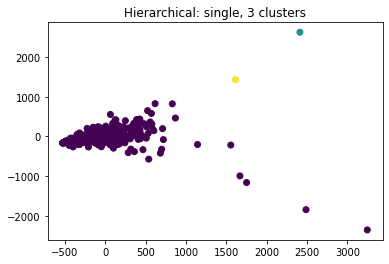

In [320]:
plt.scatter(new_X[:, 0], new_X[:, 1], c=single_3.labels_)
plt.title("Hierarchical: single, 3 clusters")
plt.show()

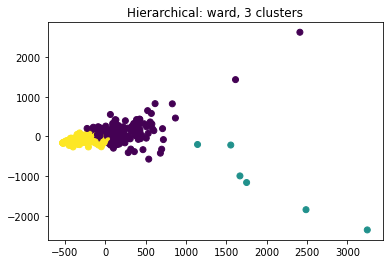

In [321]:
plt.scatter(new_X[:, 0], new_X[:, 1], c=ward_3.labels_)
plt.title("Hierarchical: ward, 3 clusters")
plt.show()

# Parte 3: Problema Abierto

En esta pregunta usted deberá practicar un proceso reducido de minería de datos. Con el conjunto de datos que le daremos a continuación, usted deberá hacer una exploración de datos, aplicar las técnicas correspondientes de pre procesamiento de datos respecto a lo que encuentre y entrenar modelos de clasificación. Finalmente deberá evaluar los modelos que entrenó y justificar la elección de alguno de ellos.

Ejecute el siguiente código para cargar los datos que usaremos en esta parte. Los datos se encuentran en el archivo `movies.csv` adjunto en el zip.

**Estamos interesados en predecir la variable `imdb_score` a partir de los demas datos.** `imdb_score` es un entero y puede considerarlo como un variable categórica.

In [284]:
# ponga aqui donde tiene el archivo
data_file = "movies.csv"

data = pd.read_csv(data_file)
data.head()

,movie_title,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,color,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,language,country,content_rating,budget,aspect_ratio
0,Avatar,8,2009.0,886204,723.0,3054.0,Color,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,178.0,760505847.0,English,USA,PG-13,237000000.0,1.78
1,Pirates of the Caribbean: At World's End,7,2007.0,471220,302.0,1238.0,Color,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,169.0,309404152.0,English,USA,PG-13,300000000.0,2.35
2,Spectre,7,2015.0,275868,602.0,994.0,Color,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,148.0,200074175.0,English,UK,PG-13,245000000.0,2.35
3,The Dark Knight Rises,8,2012.0,1144337,813.0,2701.0,Color,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,164.0,448130642.0,English,USA,PG-13,250000000.0,2.35
4,Star Wars: Episode VII - The Force Awakens ...,7,NaN,8,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploración de datos

**1.** Explore el dataset y de una descripción del dataset. Algunos puntos que puede tocar son el número de datos en el dataset, número de features, tipos de cada features y rangos, datos erroneos, etc.
Aplique el preprocesamiento necesario tal que los datos queden usables para los modelos de clasificación.

Nota: Como la parte de exploración puede ser tan compleja y detallada como uno quiera, tendremos una pauta con lo mínimo que uno debería hacer en un dataset. Consideraremos análisis más detallados como un bonus a esta u otras tareas.

Como una guía para encaminar la exploración, puede considerar los siguientes hints.

**Hints generales:**
* Los datos no vienen limpios y tienen varios problemas que usted sabe como solucionar.
* Qué tipos de datos tiene cada columna?
* Cómo se relacionan las features?

**Hints para bonus:** (no todos los hints corresponden a un puro análisis o procesamiento que pueden hacer sobre los datos, 2 hints pueden corresponden a la misma recomendación)
* Hay features (categóricas) que no aportan información, qué análisis le serviría para ver cómo impactan en el score?
* Revise los nombres de actores y directores.
* Algunas features tienen outliers, encuéntrelos y limpie el dataset. Recuerde el boxplot.
* Qué pasa si hay features extremadamente relacionadas entre sí?
* Temporalmente, son todos los datos representativos al escenario actual?
* Considere el siguiente código y vea si le sirve para algún tipo de análisis:
```python
feature = "..."
# esto cuenta las ocurrencias de cada valor en 'feature'
count = data[feature].value_counts()
# esto calcula el score promedio por cada valor del 'feature'
avg_score = data.groupby(feature)["imdb_score"].mean()
# los juntamos en un mismo dataframe
count.to_frame().join(avg_score)
```


# Respuesta

## Exploración inicial

Empezaremos viendo las estadísticas básicas del dataset.

In [285]:
# Nombre de columnas
data.columns

Index(['movie_title', 'imdb_score', 'title_year', 'num_voted_users',
       'num_critic_for_reviews', 'num_user_for_reviews', 'color',
       'director_name', 'director_facebook_likes', 'actor_1_name',
       'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes',
       'actor_3_name', 'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'movie_facebook_likes', 'duration', 'gross', 'language', 'country',
       'content_rating', 'budget', 'aspect_ratio'],
      dtype='object')

In [286]:
# Dimensiones
data.shape

(5043, 24)

In [287]:
# Resumn del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   imdb_score                 5043 non-null   int64  
 2   title_year                 4935 non-null   float64
 3   num_voted_users            5043 non-null   int64  
 4   num_critic_for_reviews     4993 non-null   float64
 5   num_user_for_reviews       5022 non-null   float64
 6   color                      5024 non-null   object 
 7   director_name              4939 non-null   object 
 8   director_facebook_likes    4939 non-null   float64
 9   actor_1_name               5036 non-null   object 
 10  actor_1_facebook_likes     5036 non-null   float64
 11  actor_2_name               5030 non-null   object 
 12  actor_2_facebook_likes     5030 non-null   float64
 13  actor_3_name               5020 non-null   objec

In [288]:
# Descripción
data.describe()

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,budget,aspect_ratio
count,5043.000000,4935.000000,5.043000e+03,4993.000000,5022.000000,4939.000000,5036.000000,5030.000000,5020.000000,5043.000000,5043.000000,5028.000000,4.159000e+03,4.551000e+03,4714.000000
mean,6.439421,2002.470517,8.366816e+04,140.194272,272.770808,686.509212,6560.047061,1651.754473,645.009761,9699.063851,7525.964505,107.201074,4.846841e+07,3.975262e+07,2.220403
std,1.167476,12.474599,1.384853e+05,121.601675,377.982886,2813.328607,15020.759120,4042.438863,1665.041728,18163.799124,19320.445110,25.197441,6.845299e+07,2.061149e+08,1.385113
min,2.000000,1916.000000,5.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.620000e+02,2.180000e+02,1.180000
25%,6.000000,1999.000000,8.593500e+03,50.000000,65.000000,7.000000,614.000000,281.000000,133.000000,1411.000000,0.000000,93.000000,5.340988e+06,6.000000e+06,1.850000
50%,7.000000,2005.000000,3.435900e+04,110.000000,156.000000,49.000000,988.000000,595.000000,371.500000,3090.000000,166.000000,103.000000,2.551750e+07,2.000000e+07,2.350000
75%,7.000000,2011.000000,9.630900e+04,195.000000,326.000000,194.500000,11000.000000,918.000000,636.000000,13756.500000,3000.000000,118.000000,6.230944e+07,4.500000e+07,2.350000
max,10.000000,2016.000000,1.689764e+06,813.000000,5060.000000,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,511.000000,7.605058e+08,1.221550e+10,16.000000


## Limpieza de Datos:

Lo primero que haremos para limpiar los datos del dataset será buscar instancias duplicadas, las cuales eliminaremos en caso de que existan

In [289]:
print(data.duplicated().sum())
duplicates = data[data['movie_title'].duplicated(keep=False)].sort_values('movie_title',ascending=False)
duplicates.head()

45


,movie_title,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,color,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,language,country,content_rating,budget,aspect_ratio
2169,Wicker Park,7,2004.0,44979,98.0,298.0,Color,Paul McGuigan,118.0,Jessica Paré,489.0,Christopher Cousins,93.0,Mark Camacho,40.0,679,0,114.0,12831121.0,English,USA,PG-13,30000000.0,2.35
1697,Wicker Park,7,2004.0,44979,98.0,298.0,Color,Paul McGuigan,118.0,Jessica Paré,489.0,Christopher Cousins,93.0,Mark Camacho,40.0,679,0,114.0,12831121.0,English,USA,PG-13,30000000.0,2.35
1305,Victor Frankenstein,6,2015.0,28618,159.0,91.0,Color,Paul McGuigan,118.0,Daniel Radcliffe,11000.0,Spencer Wilding,1000.0,Daniel Mays,287.0,12876,11000,110.0,5773519.0,English,USA,PG-13,40000000.0,2.35
2099,Victor Frankenstein,6,2015.0,28621,159.0,91.0,Color,Paul McGuigan,118.0,Daniel Radcliffe,11000.0,Spencer Wilding,1000.0,Daniel Mays,287.0,12876,11000,110.0,5773519.0,English,USA,PG-13,40000000.0,2.35
1146,Victor Frankenstein,6,2015.0,28618,159.0,91.0,Color,Paul McGuigan,118.0,Daniel Radcliffe,11000.0,Spencer Wilding,1000.0,Daniel Mays,287.0,12876,11000,110.0,5773519.0,English,USA,PG-13,40000000.0,2.35


Dado que encontramos datos duplicados en el dataset, procederemos a eliminarlos para limpiar la base:

In [290]:
data=data.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)

print(data.duplicated().sum())

0


Para seguir limpiando los datos, analizaremos la correlación existente dentro de los atributos del dataset. De este modo, podremos decidir que atributos nos podrían entregar información relevante y cuales no.

Por ejemplo, las columnas de facebook_likes de los actores y el director podrían resumirse usando únicamente la columna "movie_facebook_likes", ya que a diferencia de los otros atributos similares, este tiene una mayor correlación con imdb_score.

Otros atributos que tienen poca correlación con imdb_score son "budget" y "aspect_ratio", los cuales también podríamos eliminar del dataset.

In [291]:
# Correlación de atributos
data.corr() 

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,num_user_for_reviews,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,duration,gross,budget,aspect_ratio
imdb_score,1.000000,-0.203998,0.397445,0.301007,0.288638,0.163431,0.073417,0.077009,0.048115,0.081361,0.241950,0.256052,0.194029,0.030561,0.064157
title_year,-0.203998,1.000000,0.007232,0.276845,-0.002355,-0.064856,0.086286,0.102083,0.095383,0.109263,0.217227,-0.137076,0.029110,0.044953,0.159494
num_voted_users,0.397445,0.007232,1.000000,0.624255,0.798691,0.299873,0.191239,0.265317,0.277918,0.261063,0.535218,0.313935,0.635271,0.079069,-0.014510
num_critic_for_reviews,0.301007,0.276845,0.624255,1.000000,0.608175,0.181246,0.189533,0.280421,0.265591,0.260753,0.681723,0.257529,0.477603,0.119237,-0.050243
num_user_for_reviews,0.288638,-0.002355,0.798691,0.608175,1.000000,0.223519,0.144768,0.217153,0.225871,0.204547,0.398795,0.328413,0.561006,0.084149,-0.024867
director_facebook_likes,0.163431,-0.064856,0.299873,0.181246,0.223519,1.000000,0.091374,0.121191,0.123204,0.120781,0.162588,0.173027,0.146368,0.021015,0.001390
actor_1_facebook_likes,0.073417,0.086286,0.191239,0.189533,0.144768,0.091374,1.000000,0.389749,0.250000,0.952760,0.133604,0.087567,0.153083,0.022202,-0.020262
actor_2_facebook_likes,0.077009,0.102083,0.265317,0.280421,0.217153,0.121191,0.389749,1.000000,0.556366,0.625837,0.237699,0.129660,0.254172,0.043152,-0.007599
actor_3_facebook_likes,0.048115,0.095383,0.277918,0.265591,0.225871,0.123204,0.250000,0.556366,1.000000,0.470036,0.267775,0.119806,0.289965,0.045718,-0.003095
cast_total_facebook_likes,0.081361,0.109263,0.261063,0.260753,0.204547,0.120781,0.952760,0.625837,0.470036,1.000000,0.204378,0.120975,0.240049,0.035525,-0.017977


In [292]:
data = data.drop(['director_facebook_likes', 'actor_1_facebook_likes', 
                  'actor_2_facebook_likes', 'actor_3_facebook_likes', 
                  'cast_total_facebook_likes', 'budget', 'aspect_ratio', 
                  'movie_title','num_user_for_reviews'], axis=1)
data.head()

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,color,director_name,actor_1_name,actor_2_name,actor_3_name,movie_facebook_likes,duration,gross,language,country,content_rating
0,8,2009.0,886204,723.0,Color,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,33000,178.0,760505847.0,English,USA,PG-13
1,7,2007.0,471220,302.0,Color,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,0,169.0,309404152.0,English,USA,PG-13
2,7,2015.0,275868,602.0,Color,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,85000,148.0,200074175.0,English,UK,PG-13
3,8,2012.0,1144337,813.0,Color,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164000,164.0,448130642.0,English,USA,PG-13
4,7,NaN,8,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,0,NaN,NaN,NaN,NaN,NaN


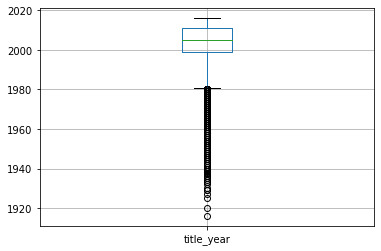

In [293]:
data.boxplot(column='title_year')

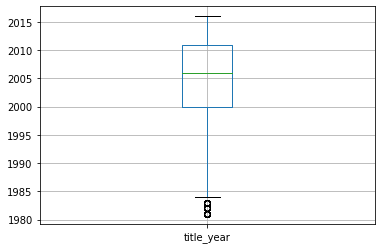

In [294]:
data = data[data.title_year>1980]
data.boxplot(column='title_year')

In [295]:
#data.boxplot(column='num_critic_for_reviews')

In [296]:
#data = data[data.num_critic_for_reviews<500]
#data.boxplot(column='num_critic_for_reviews')

In [297]:
#data.boxplot(column='num_user_for_reviews')

In [298]:
#data = data[data.num_user_for_reviews<1000]
#data.boxplot(column='num_user_for_reviews')

Seguiremos ahora con la búsqueda de valores nulos.

In [299]:
# Valores Nulos
data.isna().sum()

imdb_score                  0
title_year                  0
num_voted_users             0
num_critic_for_reviews     40
color                      15
director_name               0
actor_1_name                7
actor_2_name               10
actor_3_name               16
movie_facebook_likes        0
duration                   12
gross                     603
language                    5
country                     1
content_rating            253
dtype: int64

Dado que el atributo 'gross' tiene una gran cantidad de valores nulos (casi un 20%), decidimos eliminar esta columna por completo. Por otro lado, eliminaremos las filas que contengan datos vacíos.

In [300]:
data = data.drop(['gross'], axis=1)
data.head()

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,color,director_name,actor_1_name,actor_2_name,actor_3_name,movie_facebook_likes,duration,language,country,content_rating
0,8,2009.0,886204,723.0,Color,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,33000,178.0,English,USA,PG-13
1,7,2007.0,471220,302.0,Color,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,0,169.0,English,USA,PG-13
2,7,2015.0,275868,602.0,Color,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,85000,148.0,English,UK,PG-13
3,8,2012.0,1144337,813.0,Color,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164000,164.0,English,USA,PG-13
5,7,2012.0,212204,462.0,Color,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,24000,132.0,English,USA,PG-13


In [301]:
data = data.dropna()
data.isna().sum()
print(data.shape)

(4316, 14)


## Entrenamiento y Evaluación

**2.** Escoja 2 modelos que hayan visto dentro del curso y entrénelos sobre los datos trabajados en la parte anterior. Recuerde aplicar buenas prácticas de entrenamiento vistas en clases y aplicadas en la tarea anterior. Evalúe los modelos en base a métricas vistas en el curso. Puede hacer gráficos o generar tablas para analizar y comparar los modelos.

In [302]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [303]:
# tipos de datos
data.dtypes

imdb_score                  int64
title_year                float64
num_voted_users             int64
num_critic_for_reviews    float64
color                      object
director_name              object
actor_1_name               object
actor_2_name               object
actor_3_name               object
movie_facebook_likes        int64
duration                  float64
language                   object
country                    object
content_rating             object
dtype: object

Dado que tenemos muchos datos en formato de strings, procederemos a asignarles un identificador para poder usarlos correctamente:

In [304]:
# Label Encoder, que asigna un id por cada valor único en formato str
label_encoder = preprocessing.LabelEncoder()

# Usamos el label encoder en cada columna con datos no numéricos
data.color = label_encoder.fit_transform(data.color)
data.director_name = label_encoder.fit_transform(data.director_name)
data.actor_1_name = label_encoder.fit_transform(data.actor_1_name)
data.actor_2_name = label_encoder.fit_transform(data.actor_2_name)
data.actor_3_name = label_encoder.fit_transform(data.actor_3_name)
data.language = label_encoder.fit_transform(data.language)
data.country = label_encoder.fit_transform(data.country)
data.content_rating = label_encoder.fit_transform(data.content_rating)

data.head()

,imdb_score,title_year,num_voted_users,num_critic_for_reviews,color,director_name,actor_1_name,actor_2_name,actor_3_name,movie_facebook_likes,duration,language,country,content_rating
0,8,2009.0,886204,723.0,1,766,212,1161,2945,33000,178.0,10,52,4
1,7,2007.0,471220,302.0,1,668,803,1852,1173,0,169.0,10,52,4
2,7,2015.0,275868,602.0,1,1709,288,2070,2682,85000,148.0,10,51,4
3,8,2012.0,1144337,813.0,1,320,1598,447,1487,164000,164.0,10,52,4
5,7,2012.0,212204,462.0,1,83,365,2122,2315,24000,132.0,10,52,4


In [305]:
trainig_set = data.drop(['imdb_score'], axis=1)

train_X, test_X, train_imdb, test_imdb = train_test_split(trainig_set,
                                                          data['imdb_score'],
                                                          test_size=.33, random_state=37,
                                                          stratify=data["imdb_score"])

print(f"Training examples: {len(train_X)}, testing examples {len(test_X)}")

Training examples: 2891, testing examples 1425


In [306]:
classifier_Tree = DecisionTreeClassifier()
classifier_Tree.fit(train_X, train_imdb)

predicciones_Tree = classifier_Tree.predict(test_X)
accuracy_Tree = accuracy_score(test_imdb, predicciones_Tree)
print(f"Accuracy: {accuracy_Tree:.2%}")

Accuracy: 37.68%


In [307]:
classifier_Svc = SVC(max_iter=300000)
classifier_Svc.fit(train_X, train_imdb)

predicciones_Svc = classifier_Svc.predict(test_X)
accuracy_Svc = accuracy_score(test_imdb, predicciones_Svc)
print(f"Accuracy: {accuracy_Svc:.2%}")


Accuracy: 43.79%


In [308]:
print("-------------------------------------------------------")
print("SVC")
print(classification_report(test_imdb, predicciones_Svc))
print("-------------------------------------------------------")
print("Tree")
print(classification_report(test_imdb, predicciones_Tree))
print("-------------------------------------------------------")

-------------------------------------------------------
SVC
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00       162
           6       0.40      0.86      0.55       496
           7       0.49      0.29      0.36       471
           8       0.70      0.29      0.41       202
           9       1.00      0.29      0.44         7

    accuracy                           0.44      1425
   macro avg       0.32      0.22      0.22      1425
weighted avg       0.41      0.44      0.37      1425

-------------------------------------------------------
Tree
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.07      0.06      0.06        18
           4       0.20      0.18      0.19        62
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Conclusiones

**3.** Si este fuera un estudio encargado a usted por alguna empresa o cliente, basándose en los análisis que hizo anteriormente, qué conclusiones reportaría? Qué modelo propondría que fuera implementado en el producto del cliente? Por qué?




>Respuesta:
>
>Bajo el estudio realizado se obtuvo que incluso después de limpiar el dataset, eliminar valores nulos, eliminar atributos irrelevantes y eliminar outliers obtenemos clasificadores de bajo rendimiento.  Podemos concluir entonces que falta información, ya sea atributos no considerados o un dataset con mayor cantidad de datos. 
>
>Propondríamos por el momento que se implemente el modelo de clasificación *support vector machine* ya que ha sido el que a presentado mayor rendimiento. No obstante, no podemos asegurar con certeza que este sea el mejor clasificador para este problema, ya que como se dijo anterior mente, todavía hace falta mas información.
